Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg', 'info', 'random', 'power', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


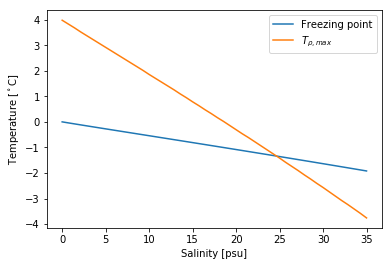

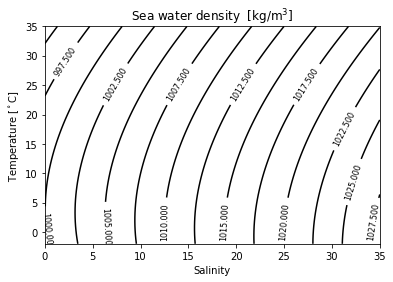

In [11]:
%pylab inline
from pylab import *
from seawater.eos80 import dens,fp # pip install seawater

T=linspace(-4,6,1000)# Temperature in deg C
S=linspace(0,35) # Salinity in psu
p=0. # pressure db

# Calculate temperature of density maximum 
tmax=zeros(S.shape[0])
for i,si in enumerate(S):
    rho=dens(si,T,p) # Calculate array of densities 
    tmax[i]=T[argmax(rho)] # Get index of maximum value

figure()
plot(S,fp(S,p),label='Freezing point')
plot(S,tmax,label=r'$T_{\rho, max}$')
legend()
xlabel('Salinity [psu]')
ylabel('Temperature [$^\circ$C]')

figure()
S=linspace(0,35)
T=linspace(-2,35)

rho=zeros((S.size,T.size)) 

for i,t in enumerate(T):
    rho[i,:]=dens(S,t,p)

figure()
CS = contour(S,T,rho,15,colors='k')
clabel(CS, fontsize=8, inline=1)
ylabel('Temperature [$^\circ$C]')
xlabel('Salinity')
title('Sea water density  [kg/m$^3$]')
show()